Using as the input the output of the detection pipeline as a mask to process and output 4 corners of the flayble area

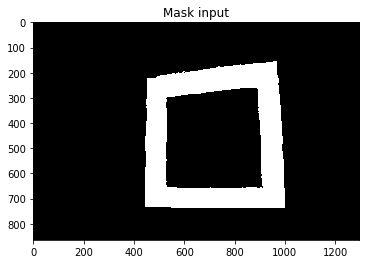

In [139]:
from matplotlib import pyplot as plt
import imutils
import numpy as np
import cv2

img = cv2.imread('images/mask.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur =  cv2.GaussianBlur(gray, (5, 5), 0)

th1 = cv2.threshold(mask_gray,127,255,cv2.THRESH_BINARY)[1]
#th1 = cv2.threshold(img_blur,127,255,cv2.THRESH_BINAR_INV)[1]

result = cv2.cvtColor(th1, cv2.COLOR_GRAY2RGB)
plt.imshow(result)
plt.title('Mask input')
plt.show()

## Shape detection

### Refs
https://stackoverflow.com/questions/50984205/how-to-find-corners-points-of-a-shape-in-an-image-in-opencv


527 258 385 398 374


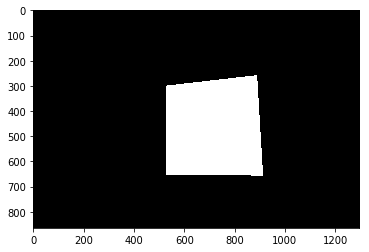

442 152 557 586 366


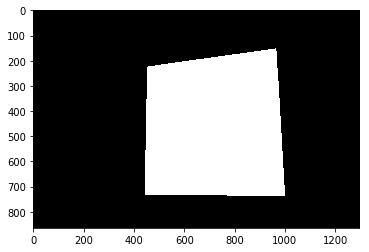

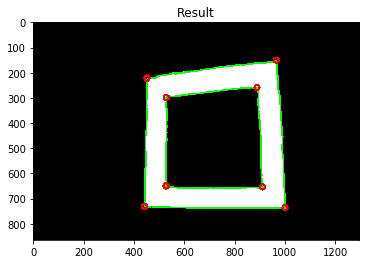

[{'area': 153230, 'centroid': (717, 467), 'corners': array([[647.49554, 431.49792],
       [887.62683, 259.23737],
       [528.2706 , 299.75394],
       [527.506  , 649.6024 ],
       [909.7881 , 653.6502 ]], dtype=float32)}, {'area': 326402, 'centroid': (721, 463), 'corners': array([[647.4954 , 431.49835],
       [964.7998 , 151.53139],
       [451.8188 , 222.81879],
       [441.71625, 731.12854],
       [998.46075, 736.7724 ]], dtype=float32)}]


In [151]:
img_result = img.copy()

results = []

_min_pixels_size = 10

#cnts = cv2.findContours(th1.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cv2.findContours(th1.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

for c in cnts:
    
    # Perform shape approximation
    epsilon = 0.1*cv2.arcLength(c,True) #0.04
    approx = cv2.approxPolyDP(c, epsilon, True)
    
    # 4 sides?
    if (len(approx)==4):
        
        cv2.drawContours(img_result, [c], -1, (0, 255, 0), 5)
        
        (x, y, w, h) = cv2.boundingRect(approx)
        if (w>=_min_pixels_size and h>=_min_pixels_size):
            
            result = {}
            
            print(x, y, w, h, len(c))
            
            area = w * h
            result['area'] = area
            
            M = cv2.moments(c)
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            
            result['centroid'] = (cx, cy)
            
            # create mask for edge detection
            gray = np.float32(th1)
            mask = np.zeros(gray.shape, dtype="uint8")
            cv2.fillPoly(mask, [approx], (255,255,255))
            
            dst = cv2.cornerHarris(mask,5,3,0.04)
            ret, dst = cv2.threshold(dst,0.1*dst.max(),255,0)
            dst = np.uint8(dst)
            ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
            criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
            corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
            
            result['corners'] = corners
            
            results.append(result)
            
            for i in range(1, len(corners)):
                #print(corners[i,0])
                cv2.circle(img_result, (int(corners[i,0]), int(corners[i,1])), 10, (255,0,0), 7)

            #print(corners)
            
            plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))
            plt.show()
            
            
        

plt.imshow(img_result)
plt.title('Result')
plt.show()

print(results)

In [ ]:
()